In [ ]:
!pip install textblob
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [ ]:
df = pd.read_excel("my_data.xlsx")

def clean_tweet(tweet):
    tweet = str(tweet).lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+","",tweet)
    tweet = re.sub(r"@\w+|#","",tweet)
    tweet = re.sub(r"[^\w\s]","",tweet)
    tweet = re.sub(r"\d+","",tweet)
    return tweet.strip()

df["clean_text"] = df["text"].apply(clean_tweet)


In [ ]:
vader = SentimentIntensityAnalyzer()
df["vader_score"] = df["clean_text"].apply(lambda x: vader.polarity_scores(x)["compound"])
df["textblob_score"] = df["clean_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

def classify(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["vader_sentiment"] = df["vader_score"].apply(classify)
df["textblob_sentiment"] = df["textblob_score"].apply(classify)

df.to_excel("agnipath_sentiments.xlsx",index=False)


In [ ]:
df.head()

,text,clean_text,vader_score,textblob_score,vader_sentiment,textblob_sentiment
0,⚔️ Final WAR for Selection! | Army Bharti 2025...,final war for selection army bharti rapid fi...,-0.7430,0.175,Negative,Positive
1,Nepali action movies that used to release in m...,nepali action movies that used to release in m...,0.0000,0.100,Neutral,Positive
2,"Over 1,000 personnel and families participated...",over personnel and families participated in t...,0.0000,-0.100,Neutral,Negative
3,"Earth, One Health 🌍🧘‍♂️\n\nIndia’s timeless gi...",earth one health \n\nindias timeless giftyogai...,0.1779,0.000,Positive,Neutral
4,Department of Tourism J&amp;K celebrated Inte...,department of tourism jampk celebrated intern...,0.8225,0.400,Positive,Positive


In [ ]:
from collections import Counter

# Word cloud idea: Most common words in positive tweets
positive_words = " ".join(df[df["textblob_sentiment"] == "Positive"]["clean_text"]).split()
common_positive = Counter(positive_words).most_common(20)
print("Most common words in positive tweets:\n", common_positive)


Most common words in positive tweets:
 [('agnipath', 17), ('the', 16), ('agniveer', 13), ('a', 11), ('of', 10), ('agnipathscheme', 8), ('and', 7), ('indianarmy', 6), ('in', 6), ('yoga', 6), ('badltajk', 6), ('is', 6), ('nashamuktjk', 5), ('veeronkibhoomi', 5), ('with', 5), ('this', 5), ('army', 4), ('to', 4), ('earthquake', 4), ('for', 3)]


In [ ]:
from collections import Counter

# Word cloud idea: Most common words in positive tweets
positive_words = " ".join(df[df["textblob_sentiment"] == "Negative"]["clean_text"]).split()
common_positive = Counter(positive_words).most_common(20)
print("Most common words in negative tweets:\n", common_positive)


Most common words in positive tweets:
 [('to', 13), ('of', 13), ('the', 12), ('agnipath', 11), ('agniveer', 11), ('agnipathscheme', 9), ('earthquake', 9), ('a', 8), ('in', 7), ('nashamuktjk', 6), ('veeronkibhoomi', 6), ('badltajk', 6), ('france', 6), ('th', 4), ('military', 4), ('we', 4), ('train', 4), ('today', 4), ('progressingjk', 4), ('spearcorps', 4)]


In [ ]:
from collections import Counter

# Word cloud idea: Most common words in positive tweets
positive_words = " ".join(df[df["vader_sentiment"] == "Positive"]["clean_text"]).split()
common_positive = Counter(positive_words).most_common(20)
print("Most common words in negative tweets:\n", common_positive)


Most common words in negative tweets:
 [('the', 29), ('of', 22), ('agnipath', 21), ('agniveer', 20), ('agnipathscheme', 17), ('to', 13), ('and', 12), ('veeronkibhoomi', 12), ('badltajk', 12), ('nashamuktjk', 11), ('in', 10), ('earthquake', 10), ('a', 9), ('is', 8), ('with', 8), ('progressingjk', 8), ('yoga', 7), ('indianarmy', 6), ('army', 6), ('operational', 6)]


In [ ]:
from collections import Counter

# Word cloud idea: Most common words in positive tweets
positive_words = " ".join(df[df["vader_sentiment"] == "Negative"]["clean_text"]).split()
common_positive = Counter(positive_words).most_common(20)
print("Most common words in negative tweets:\n", common_positive)


Most common words in negative tweets:
 [('agniveer', 9), ('agnipath', 9), ('the', 9), ('a', 9), ('on', 5), ('of', 5), ('to', 5), ('agnipathscheme', 5), ('badltajk', 4), ('we', 4), ('train', 4), ('and', 4), ('veeronkibhoomi', 3), ('at', 3), ('army', 2), ('indianarmy', 2), ('th', 2), ('yoga', 2), ('conducted', 2), ('from', 2)]


##Sentiment Distribution Summary##
Counting the number of positive, negative and neutral tweets (for both Vader and TextBlob)

In [ ]:
df["textblob_sentiment"].value_counts()


,count
textblob_sentiment,
Neutral,23
Positive,16
Negative,11


In [ ]:
df["vader_sentiment"].value_counts()

,count
vader_sentiment,
Positive,23
Neutral,18
Negative,9


Calculating the match rate between vader and textblob

In [ ]:
df["match"] = df["vader_sentiment"] == df["textblob_sentiment"]
print("Match Rate:", df["match"].mean())

Match Rate: 0.42


##Comparing Sentiment Outputs##

In [ ]:
summary = pd.DataFrame({
"Model": ["TextBlob", "VADER"],
"Positive": [df["textblob_sentiment"].value_counts().get("Positive",
0),
df["vader_sentiment"].value_counts().get("Positive", 0)],
"Neutral": [df["textblob_sentiment"].value_counts().get("Neutral", 0),
df["vader_sentiment"].value_counts().get("Neutral", 0)],
"Negative": [df["textblob_sentiment"].value_counts().get("Negative",
0),
df["vader_sentiment"].value_counts().get("Negative", 0)],
})
summary["Total"] = summary[["Positive", "Neutral",
"Negative"]].sum(axis=1)


In [ ]:
summary

,Model,Positive,Neutral,Negative,Total
0,TextBlob,16,23,11,50
1,VADER,23,18,9,50


##WordClouds for Sentiment Classes
Generating WordClouds from tweets labeled Positive and Negative (based on Vader)

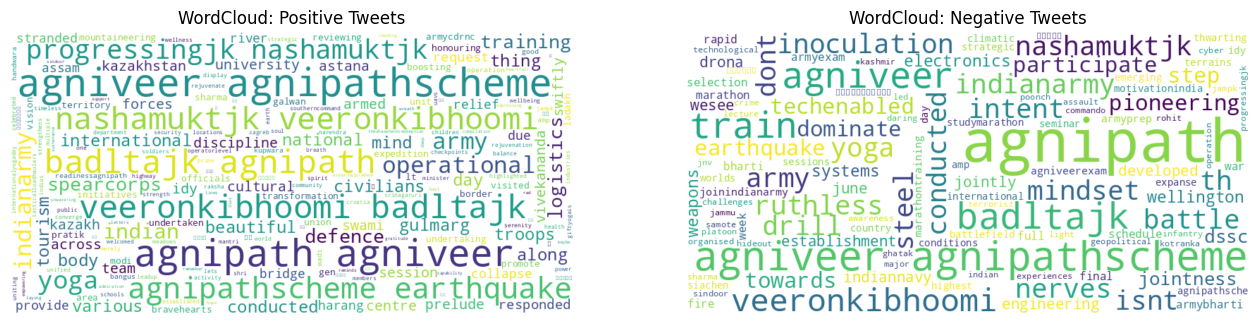

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
positive_text = " ".join(df[df["vader_sentiment"] ==
"Positive"]["clean_text"])
negative_text = " ".join(df[df["vader_sentiment"] ==
"Negative"]["clean_text"])
wordcloud_pos = WordCloud(width=800, height=400,
background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400,
background_color='white').generate(negative_text)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("WordCloud: Positive Tweets")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("WordCloud: Negative Tweets")
plt.axis("off")
plt.show()


##Interpretations and Key Insights##
###**1. % of Tweets that were positive**###
* For TextBlob: 32%
* For Vader: 46%
###**% of Tweets that were negative**###
* For TextBlob: 22%
* For Vader: 18%
###**% of Tweets that were neutral**###
* For TextBlob: 46%
* For Vader: 36%


###2. Common Words in each sentiment group###
* TextBlob
  * Positive:
 [('agnipath', 17), ('the', 16), ('agniveer', 13), ('a', 11), ('of', 10), ('agnipathscheme', 8), ('and', 7), ('indianarmy', 6), ('in', 6), ('yoga', 6), ('badltajk', 6), ('is', 6), ('nashamuktjk', 5), ('veeronkibhoomi', 5), ('with', 5), ('this', 5), ('army', 4), ('to', 4), ('earthquake', 4), ('for', 3)]
  * Negative:
  [('to', 13), ('of', 13), ('the', 12), ('agnipath', 11), ('agniveer', 11), ('agnipathscheme', 9), ('earthquake', 9), ('a', 8), ('in', 7), ('nashamuktjk', 6), ('veeronkibhoomi', 6), ('badltajk', 6), ('france', 6), ('th', 4), ('military', 4), ('we', 4), ('train', 4), ('today', 4), ('progressingjk', 4), ('spearcorps', 4)]

* Vader
  * Positive:
  [('the', 29), ('of', 22), ('agnipath', 21), ('agniveer', 20), ('agnipathscheme', 17), ('to', 13), ('and', 12), ('veeronkibhoomi', 12), ('badltajk', 12), ('nashamuktjk', 11), ('in', 10), ('earthquake', 10), ('a', 9), ('is', 8), ('with', 8), ('progressingjk', 8), ('yoga', 7), ('indianarmy', 6), ('army', 6), ('operational', 6)]

  * Negative:
  [('agniveer', 9), ('agnipath', 9), ('the', 9), ('a', 9), ('on', 5), ('of', 5), ('to', 5), ('agnipathscheme', 5), ('badltajk', 4), ('we', 4), ('train', 4), ('and', 4), ('veeronkibhoomi', 3), ('at', 3), ('army', 2), ('indianarmy', 2), ('th', 2), ('yoga', 2), ('conducted', 2), ('from', 2)]




###3. Did TextBlob and Vader agree or differ often##
The match score is 0.42 which shows they both disagree for more than half times